### Obstacle Map with Minkowski Distance:

1. Create a white background for the map.
2. Write all obstacles equation alongwith minkowski argument.
3. First fill the obstacles black.
4. Then, add the minkowski distance.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

robot_radius = 5
minkowski_dis = robot_radius

In [2]:
###  Coordinate System Followed throughout:
### (0,0)------------------->
###  |
###  |
###  |
###  |
###  |
###  |
###  V

# Write a circle equation; Half Planes.
def inside_a_circle(point, minkowski_req=False):
    # @ point be in format: [x, y]
    x, y = point[0], point[1]
    
    if minkowski_req == True:
        radius = 15 + minkowski_dis
    else:
        radius = 15

    if ((x-20)**2 + (y-190)**2) <= (radius**2):
        return True
    else:
        return False

# Write an ellipse equation; Half Planes.
def inside_an_ellipse(point, minkowski_req=False):
    
    x, y = point[0], point[1]
    
    if minkowski_req == True:
        min_axis = 12 + minkowski_dis
        maj_axis = 30 + minkowski_dis
    else:
        min_axis = 12
        maj_axis = 30
    
    if (((x-30)**2)/min_axis**2 + ((y-140)**2)/maj_axis**2) <= 1:
        return True
    else:
        return False

# Write Rectangle Equations; Half Planes.
def inside_a_rectangle(point, minkowski_req=False):
    x, y = point[0], point[1]
    
    if minkowski_req == True:
        offset = minkowski_dis
    else:
        offset = 0
    
    if (x<=83.5+offset) and (y<=100+offset) and (x>=33.5-offset) and (y>=50-offset):
        return True
    else:
        return False

# Write Polygon Equations; Half Planes.
def inside_a_polygon(point, minkowski_req=False):
    x, y = point[0], point[1]
    
    if minkowski_req == True:
        offset = minkowski_dis
    else:
        offset = 0
        
    h1 = (x<=135+offset)
    h2 = (y<=-0.5405*x+245.97+offset)
    
    h3 = (x>=98)
    h9 = (x<=98)
    
    h4 = (y>=-0.35135*x+197.4324)
    h10 =(y<=-0.35135*x+197.4324)
    
    h5 = (y<=0.60526*x+133.684+offset)
    h6 = (y>=-0.1842*x+181.0526-offset)
    h7 = (y<=9.5*x-768+offset)
    h8 = (y>=0.609756*x+67.6829-offset)

    
    # Convex Sets
    convex_set_1 = h1 and h2 and h3 and h4
    convex_set_2 = h5 and h6 and h9
    convex_set_3 = h10 and h7 and h8
    if convex_set_1 or convex_set_2 or convex_set_3:
        return True
    else:
        return False  

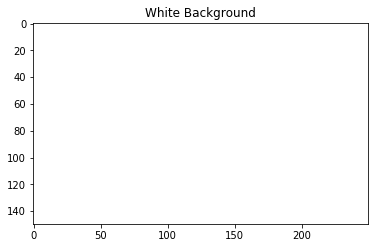

In [3]:
# Create a white background
background = np.zeros((150,250,3), np.uint8)# Height, Width: Numpy nomenclature.
background[:,:] = (255, 255, 255)# White Background

plt.imshow(background)
plt.title('White Background')
plt.show()

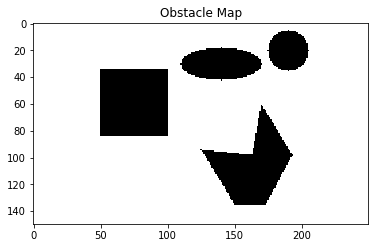

In [4]:
def create_map(image):
    image_copy = image.copy()
    for x in range(150):
        for y in range(250):
            point = [x, y]
            if inside_a_circle(point) or inside_an_ellipse(point) or inside_a_rectangle(point) or inside_a_polygon(point):
                image_copy[x,y] = (0,0,0)
            else:
                continue
    return image_copy

obstacle_map = create_map(background)
plt.imshow(obstacle_map)
plt.title('Obstacle Map')
plt.show()

Text(0.5, 1.0, 'Minkowski Map - Contours Method')

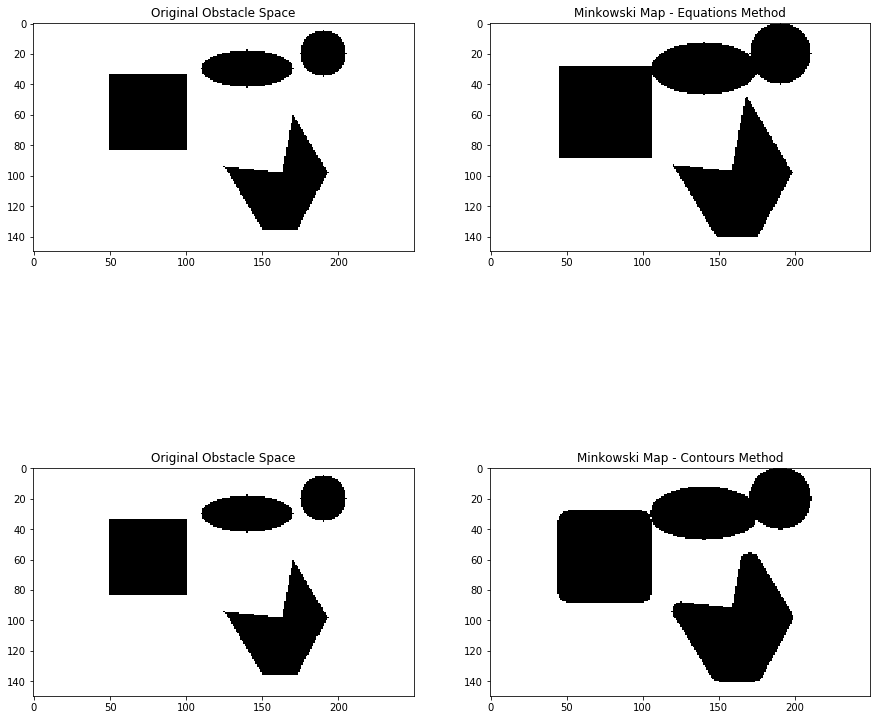

In [5]:
def minkowski_equations(map_image):
    map_image_copy = map_image.copy()
    for x in range(150):
        for y in range(250):
            point = [x, y]
            if inside_a_circle(point, minkowski_req=True) or inside_an_ellipse(point, minkowski_req=True) or inside_a_rectangle(point, minkowski_req=True) or inside_a_polygon(point, minkowski_req=True):
                map_image_copy[x,y] = (0,0,0)
            else:
                continue
    return map_image_copy

def minkowski_contours(map_image):
    map_image_copy = map_image.copy()
    edges = cv2.Canny(map_image_copy,100,200)
    contours, hierarchy = cv2.findContours(edges,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    cv2.drawContours(map_image_copy, contours, -1, (0,255,0), 1)
    contours = np.array(contours).squeeze()

    for shapes in contours:
        for contour_of_shape in shapes:
            [x,y] = contour_of_shape.squeeze()
            cv2.circle(map_image_copy, (x,y), 5, (0,0,0), -1)
    return map_image_copy

# Comparing the result from two methods.
minkowski_map_contours = minkowski_contours(obstacle_map)
minkowski_map_equations = minkowski_equations(obstacle_map)

f, axarr = plt.subplots(2, 2,figsize=(15,15))
axarr[0, 0].imshow(obstacle_map)
axarr[0, 0].set_title('Original Obstacle Space')

axarr[0, 1].imshow(minkowski_map_equations)
axarr[0, 1].set_title('Minkowski Map - Equations Method')

axarr[1, 0].imshow(obstacle_map)
axarr[1, 0].set_title('Original Obstacle Space')

axarr[1, 1].imshow(minkowski_map_contours)
axarr[1, 1].set_title('Minkowski Map - Contours Method')
